In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
def eom(theta_array, k, radius):
    theta = theta_array
    theta_dott = k**2 * np.cos(theta) / (radius**2 * np.sin(theta)**(3))

    return np.array(theta_dott)

In [3]:
step_size = 0.0001
num_steps = 20000

theta = np.zeros((num_steps+1, 1))
theta[0] = 0.1
theta_dot = np.zeros((num_steps+1, 1))
theta_dot[0] = 0.1
phi = np.array([x/100 for x in range(num_steps+1)]).reshape(num_steps+1,1)

In [4]:
for i in range(num_steps):
    theta_dot[i+1] = theta_dot[i] + eom(theta[i], 0.2, 1) * step_size
    theta[i+1] = theta[i] + theta_dot[i] * step_size

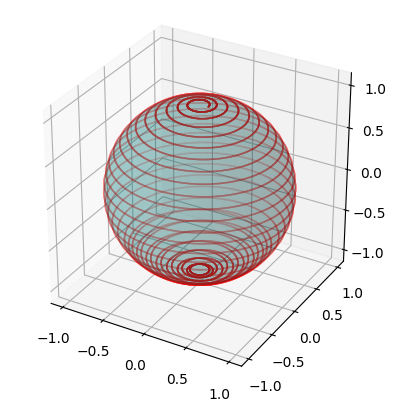

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(np.sin(theta)*np.cos(phi)
            , np.sin(theta)*np.sin(phi)
                                   , np.cos(theta), s=0.02, c='red')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
 
# Plot the surface
ax.plot_surface(x, y, z, alpha=0.2, color='teal')

# # Set an equal aspect ratio
ax.set_aspect('equal')